# Import Necessary Libraries

In [1]:
import os
import pandas as pd
import numpy as np

# Import Dataset

In [2]:
true_df = pd.read_csv(os.path.join(os.getcwd(),"dataset\\true.csv"))
fake_df = pd.read_csv(os.path.join(os.getcwd(),"dataset\\fake.csv"))

# adding target variable "true/fake" to the respective CSVs
true_df['true_or_fake']="true"
fake_df['true_or_fake']="fake"

news_df = pd.concat([true_df,fake_df],ignore_index=True)

# Exploratory Data Analysis

## Data Understanding

In [3]:
# View the dataset 
news_df

,title,text,subject,date,true_or_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [4]:
# column names
list(news_df.columns)

['title', 'text', 'subject', 'date', 'true_or_fake']

In [5]:
# get dataset size
print(f"Number of columns: {news_df.shape[1]}\nNumber of rows   : {news_df.shape[0]}")

Number of columns: 5
Number of rows   : 44898


In [6]:
# All details about the data
news_df.describe()

,title,text,subject,date,true_or_fake
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [7]:
# sample true news
news_df.head(10)

,title,text,subject,date,true_or_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",true
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",true
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",true
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",true
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",true


In [8]:
# sample fake news
news_df.tail(10)

,title,text,subject,date,true_or_fake
44888,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",fake
44889,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",fake
44890,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",fake
44891,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",fake
44892,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",fake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",fake


In [9]:
news_df["title"].value_counts()

title
Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
                                                                                                         ..
U.S. military says no civilians killed in August Somalia raid                                             1
EU calls for 'equal rights' for all in Myanmar's troubled Rakhine                                         1
Suspected U.S. drone targets Haqqani militants in Pakistan, killing four                                  1
Pope heads for Banglad

In [10]:
news_df["text"].value_counts()

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [11]:
news_df["subject"].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [12]:
news_df["date"].value_counts()

date
December 20, 2017     182
December 6, 2017      166
November 30, 2017     162
November 9, 2017      158
October 13, 2017      155
                     ... 
August 6, 2016          1
October 9, 2017         1
August 21, 2016         1
December 9, 2017        1
Jun 7, 2015             1
Name: count, Length: 2397, dtype: int64

In [13]:
news_df["true_or_fake"].value_counts()

true_or_fake
fake    23481
true    21417
Name: count, dtype: int64

## EDA

In [14]:
# get top 20 tokenised terms
# remove stopword, tokenisation, then find top 20 unigram, bigram, trigram
# wordcloud

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# from nltk.util import ngrams
import string
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Text Preprocessing Function for EDA
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # remove url
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    text = url_pattern.sub(r'', text)

    # Remove emoji
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Remove punctuation
    # match all non-alphanumeric and non-whitespace characters,
    non_alpha_pattern = r"[^\w\s]"
    text = re.sub(non_alpha_pattern, " ", text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # POS tagging and lemmatisation
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word, tag in pos_tag(tokens):
      wntag = tag[0].lower()
      wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
      lemmas.append(lemmatizer.lemmatize(word, wntag) if wntag else word)

    # furthwr cleaning
    # remove repeating characters from tokens
    RepeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in lemmas] )
    # Remove tokens containing digits
    digitTokensRm =  " ".join( [ word for word in RepeatTokensRm.split() if not re.search(r'\d', word) ] ) 
    # Remove tokens containing underscore
    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] )
    # Remove tokens containing Special Characters
    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] )
    # Remove tokens less than 2 characters
    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
# get top 20 tokenised terms
# remove stopword, tokenisation, then find top 20 unigram, bigram, trigram
# wordcloud


# concat title and text
news_df["news"] = news_df["title"] + " " + news_df["text"] 

# drop unnecessary column
news_df.drop(labels = ["title",'text',"subject", "date"], axis = 1, inplace = True)

# rename news to text
news_df.rename(columns={"news": "text"},inplace=True)

# remove rows with only whitespaces
news_df['text'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
news_df.dropna(inplace=True)

# Apply text preprocessing to the 'text' column
news_df['cleaned_text'] = news_df['text'].apply(preprocess_text)
# news_df['unigrams'], news_df['bigrams'], news_df['trigrams'] = zip(*news_df['text'].apply(preprocess_text))

# Display the preprocessed text
news_df.head()

,true_or_fake,text,cleaned_text
0,true,"As U.S. budget fight looms, Republicans flip t...",budget fight loom republican flip fiscal scrip...
1,true,U.S. military to accept transgender recruits o...,military accept transgender recruit monday pen...
2,true,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator let mueller job wash...
3,true,FBI Russia probe helped by Australian diplomat...,fbi russia probe help australian diplomat tip ...
4,true,Trump wants Postal Service to charge 'much mor...,trump want postal service charge much amazon s...


In [17]:
# unigram frequency
from nltk.tokenize import word_tokenize

text = " ".join(list(news_df['cleaned_text']))
uni_tokens = word_tokenize(text)
unigram_df = pd.DataFrame({'unigram':uni_tokens})

unigram_freq_df = unigram_df.groupby('unigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
unigram_freq_df.iloc[:19]

,unigram,count
73591,say,174059
85959,trump,149100
79497,state,64691
65580,president,58716
92893,would,55662
62775,people,42632
93539,year,42411
50092,make,40134
59957,one,39900
70013,republican,37051


In [18]:
# bigram
import itertools
from nltk import bigrams
from nltk.tokenize import word_tokenize


text = list(news_df['cleaned_text'])
bigrams_2dlist = [list(bigrams(word_tokenize(txt))) for txt in text]
bigrams_flattenlist = list(itertools.chain.from_iterable(bigrams_2dlist))

bigram_df = pd.DataFrame({'bigram':bigrams_flattenlist})

bigram_freq_df = bigram_df.groupby('bigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
bigram_freq_df.iloc[:19]

,bigram,count
845959,"(donald, trump)",27310
2995650,"(united, state)",17265
3126518,"(white, house)",16297
1288242,"(hillary, clinton)",10209
1881541,"(new, york)",9310
1902455,"(north, korea)",7373
2165710,"(president, donald)",6999
3088353,"(washington, reuters)",6673
2946120,"(trump, say)",6350
1351649,"(image, via)",6341


In [19]:
# trigram
import itertools
from nltk import trigrams
from nltk.tokenize import word_tokenize


text = list(news_df['cleaned_text'])
trigrams_2dlist = [list(trigrams(word_tokenize(txt))) for txt in text]
trigrams_flattenlist = list(itertools.chain.from_iterable(trigrams_2dlist))

trigram_df = pd.DataFrame({'trigram':trigrams_flattenlist})
trigram_freq_df = trigram_df.groupby('trigram').size().reset_index(name='count').sort_values(by='count', ascending=False)
trigram_freq_df.iloc[:19]

,trigram,count
4584511,"(president, donald, trump)",6926
2132111,"(feature, image, via)",4659
4581540,"(president, barack, obama)",3909
3947803,"(new, york, time)",2174
1740508,"(donald, trump, realdonaldtrump)",1790
5106582,"(reuters, president, donald)",1555
6702770,"(washington, reuters, president)",1521
6796991,"(white, house, say)",1224
1834916,"(elect, donald, trump)",1178
4584880,"(president, elect, donald)",1116


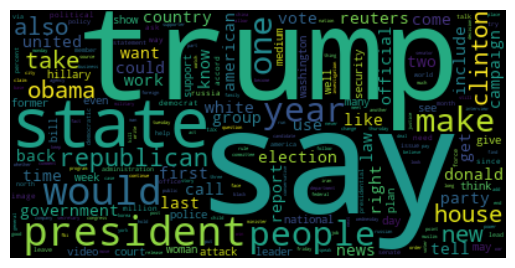

In [20]:
d = {}
for a, x in unigram_freq_df.values:
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
# export dataset to clean_news_df.csv
import os

dataset_folder = os.path.join(os.getcwd(),'dataset')
os.makedirs(dataset_folder, exist_ok=True)
news_df.to_csv(os.path.join(dataset_folder,'clean_news_df.csv'),index=False)

# Model Construction

each one choose one to play and optimise:

all need to be supervised learning model

- Logistic Regression (desmond)

- Naive Bayes (venice)

- Gradient Boosting Classifier (leedx)

- Random Forest (zhenmin)


# Model Evaluation

- confusion matrix

- Accuracy

- Precision

- Recall

- F1-Score

Model need to be optimised

use either gridcv or randomcv